# Multi-Soliton Solutions of the Einstein Equation and the Tomimatsu-Sato Metric 
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 20, 2022

Go back and redo this later

https://academic.oup.com/ptps/article/doi/10.1143/PTPS.70.215/1881867?login=true

Compare Metric 2.7 with Metric 13.1 Page 238 of Griffiths:  Weyl Lewis Papapetrou.  The W in metric 2.7 corresponds to rho in Metric 13.1 thus making 13.1 a bit simpler.

https://assets.cambridge.org/97805218/89278/frontmatter/9780521889278_frontmatter.pdf

Also compare to metric 3 from "New Formulation of Axially Symmetric Gravitational Field Problem" by Ernst

https://journals.aps.org/pr/abstract/10.1103/PhysRev.167.1175

In [11]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [12]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [13]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [14]:
f = Function('f')(rho,z)
f

In [15]:
omega = Function('omega')(rho,z)
omega

In [24]:
gamma = Function('gamma')(rho,z)
gamma

In [16]:
W = Function('W')(rho,z)
W

In [40]:
psi = Function('psi')(rho,z)
psi

In [17]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [18]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [25]:
lineElement = expand( - f * (dt - omega * dphi)**2 + (f**-1) * ( (exp(2*gamma)*(drho**2 + dz**2) + W**2 * dphi**2)) ) 
lineElement

In [26]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0             f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                    ⎥
⎢                  2⋅γ(ρ, z)                                         ⎥
⎢                 ℯ                                                  ⎥
⎢       0         ──────────               0                   0     ⎥
⎢                  f(ρ, z)                                           ⎥
⎢                                                                    ⎥
⎢                              2                                     ⎥
⎢                             W (ρ, z)            2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ──────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                                ⎥
⎢                                                                    ⎥
⎢                                                           2⋅γ(ρ, z)⎥
⎢                                                          ℯ         ⎥
⎢     

In [27]:
import sympy

In [28]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0             f(ρ, z)⋅ω(ρ, z)            0     ⎤
⎢                                                                    ⎥
⎢                  2⋅γ(ρ, z)                                         ⎥
⎢                 ℯ                                                  ⎥
⎢       0         ──────────               0                   0     ⎥
⎢                  f(ρ, z)                                           ⎥
⎢                                                                    ⎥
⎢                              2                                     ⎥
⎢                             W (ρ, z)            2                  ⎥
⎢f(ρ, z)⋅ω(ρ, z)      0       ──────── - f(ρ, z)⋅ω (ρ, z)      0     ⎥
⎢                             f(ρ, z)                                ⎥
⎢                                                                    ⎥
⎢                                                           2⋅γ(ρ, z)⎥
⎢                                                          ℯ         ⎥
⎢     

In [29]:
from einsteinpy.symbolic import *

In [30]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [31]:
metric = MetricTensor(m,syms)

In [32]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                                   ∂              2       
⎢⎢                                                                   ──(f(ρ, z))   f (ρ, z)⋅
⎢⎢                                                                   ∂ρ                     
⎢⎢                    0                                              ─────────── + ─────────
⎢⎢                                                                    2⋅f(ρ, z)             
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢∂              2               ∂                                                          
⎢⎢──(f(ρ, z))   f (ρ, z)⋅ω(ρ, z)⋅──(ω(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [33]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

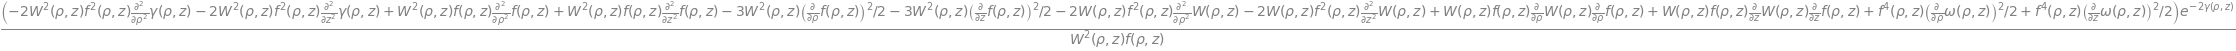

In [34]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [35]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [36]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [37]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [38]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [39]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

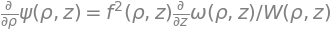

In [41]:
equation2pt9a = Eq(diff(psi,rho), (f**2/W)*diff(omega,z))
equation2pt9a

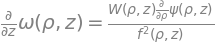

In [48]:
domegadz = Eq( diff(omega,z),solve(equation2pt9a, diff(omega,z))[0])
domegadz

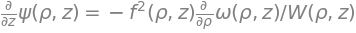

In [42]:
equation2pt9b = Eq(diff(psi,z), (-f**2/W)*diff(omega,rho))
equation2pt9b

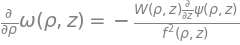

In [50]:
domegadrho = Eq(diff(omega,rho),solve(equation2pt9b,diff(omega,rho))[0])
domegadrho

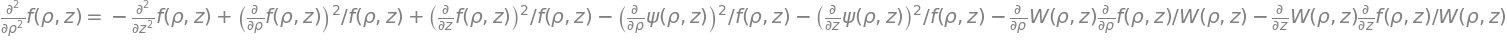

In [71]:
#  Corresponds to equation 13.7a Griffiths 
d2fdrho2 = Eq(diff(f,rho,rho), expand( solve( ricciSimplified[0,0].args[2], diff(f,rho,rho) )[0] ) ).subs(domegadz.lhs,domegadz.rhs).subs(domegadrho.lhs,domegadrho.rhs)
d2fdrho2

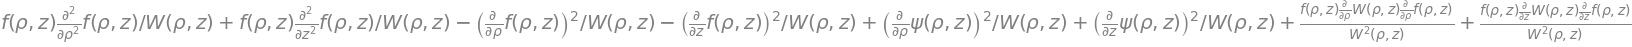

In [89]:
collect(expand((-1/W**3)*ricciSimplified[0,2].args[2]),omega).coeff(omega,1).subs(domegadz.lhs,domegadz.rhs).subs(domegadrho.lhs,domegadrho.rhs).simplify().expand()

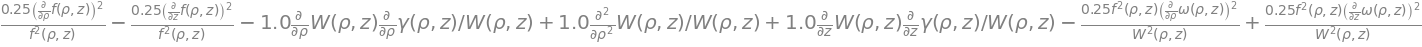

In [90]:
einsteinSimplified[3,3]